- pd.read_csv('string')  # filename or URL
- df.isnull().sum()
- df.describe(include='all') # number, by dtype, exclude
- df[col].value_counts()
- df = df.replace({" ?": np.NaN})
- pd.crosstab() #categoricals
- df.plot(kind=, stacked=, etc)
- sns.pairplot()   # big matrix of graphs
- matplotlib.style.use() , style.available

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [1]:
import pandas as pd
# Columns headers define the suit and rank of each of 5 cards in a poker hand,
# followed by the hand itself (0 = high card only, 1 = single pair, and so on)

poker_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'

column_headers = ['Suit1', 'Rank1', 'Suit2', 'Rank2', 'Suit3', 'Rank3', 'Suit4', 
                  'Rank4', 'Suit5', 'Rank5', 'Poker_Hand',]

df = pd.read_csv(poker_data_url, names=column_headers)

df.head()

,Suit1,Rank1,Suit2,Rank2,Suit3,Rank3,Suit4,Rank4,Suit5,Rank5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
print(df['Suit1'][0])
df['Suit1'].iloc[0]

1


1

In [7]:
df.tail(15)
# head and tail look good

,Suit1,Rank1,Suit2,Rank2,Suit3,Rank3,Suit4,Rank4,Suit5,Rank5,Poker_Hand
24995,2,12,1,2,4,8,3,3,4,6,0
24996,2,11,1,5,1,10,4,10,2,13,1
24997,3,7,3,13,2,4,1,12,3,8,0
24998,1,8,4,1,4,12,1,13,1,10,0
24999,4,12,3,11,4,4,3,12,2,12,3
25000,2,8,2,12,4,3,4,2,4,4,0
25001,2,12,3,5,3,8,4,1,4,2,0
25002,4,10,2,13,4,5,4,7,1,5,1
25003,1,12,2,9,2,12,4,8,1,13,1
25004,3,5,3,7,4,11,3,11,3,2,1


In [30]:
df.shape
# Matches expectations from UCI

(25010, 11)

In [31]:
df.isnull().sum()
# checked larger heads and tails, no missing value types found to convert
# to np.NaN

Suit1         0
Rank1         0
Suit2         0
Rank2         0
Suit3         0
Rank3         0
Suit4         0
Rank4         0
Suit5         0
Rank5         0
Poker_Hand    0
dtype: int64

In [32]:
df.dtypes

Suit1         int64
Rank1         int64
Suit2         int64
Rank2         int64
Suit3         int64
Rank3         int64
Suit4         int64
Rank4         int64
Suit5         int64
Rank5         int64
Poker_Hand    int64
dtype: object

In [33]:
df.describe(include='all')

,Suit1,Rank1,Suit2,Rank2,Suit3,Rank3,Suit4,Rank4,Suit5,Rank5,Poker_Hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [8]:
# All columns are numerical
df.describe(exclude='number')

ValueError: No objects to concatenate

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [11]:
# Data is separated by semicolons rather than commas
df1 = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

df1.head()
# looks good

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df1.tail()
# looks good

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [13]:
df1.shape
# This is what UCI reported (20 instead of 21)

(41188, 21)

In [14]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df1.head(20)
# Check for missing values. None found except "unknown" under "default"
# attribute.
# Let's see if that's a missing value.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
df1['default'].value_counts()
#df1['loan'].value_counts()
#df1['housing'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

In [26]:
import numpy as np

df1 = df1.replace({"unknown": np.NaN})

df1.isnull().sum()
# If "unknown" is taken to mean missing values, we can replace them

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [27]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [28]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
df1.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [43]:
def print_all_crosstabs(df):
    '''Makes crosstabs of all categorical variables in a Pandas DataFrame'''
    lst = list(df.describe(exclude='number').columns.values)
    tabs = {}
    for i in range(len(lst) - 1):
        for j in range(1,len(lst)):
            tab = pd.crosstab(df[lst[i]], df[lst[j]])
            tabs[str(lst[i]) + '/' + str(lst[j])] = tab
    for key, val in tabs.items():
        print(key, '\n', val, '\n')

print_all_crosstabs(df1)

job/marital 
 marital        divorced  married  single
job                                     
admin.             1280     5253    3875
blue-collar         728     6687    1825
entrepreneur        179     1071     203
housemaid           161      777     119
management          331     2089     501
retired             348     1274      93
self-employed       133      904     379
services            532     2294    1137
student               9       41     824
technician          774     3670    2287
unemployed          124      634     251 

job/education 
 education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               77       151       499         3329           1   
blue-collar        2318      1426      3623          878           8   
entrepreneur        137        71       210          234           2   
housemaid           474        77        94          174           1   
man

In [45]:
pd.crosstab(df1['housing'], df1['loan'])

loan,no,yes
housing,,
no,16065,2557
yes,17885,3691


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

<AxesSubplot:>

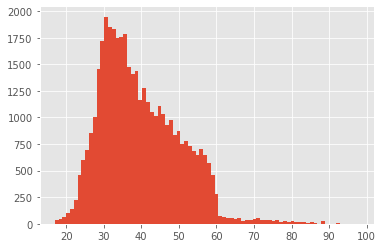

In [77]:
# sharp dropoff after age 60

df1['age'].hist(bins=80)

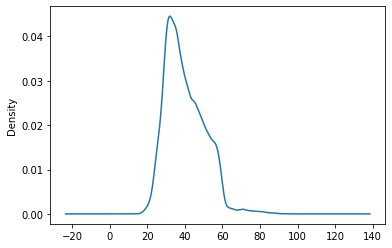

In [50]:
df1['age'].plot.density();

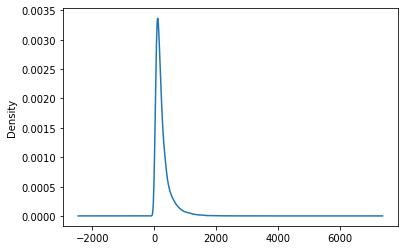

In [49]:
df1['duration'].plot.density();

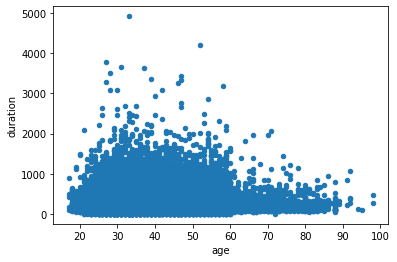

In [51]:
# plots age versus duration of last phone call

df1.plot.scatter('age', 'duration');

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [65]:
table = pd.crosstab(df1['marital'], df1['education'])

table

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
marital,,,,,,,
divorced,489,182,565,1193,2,657,1337
married,3228,1767,4156,5158,15,3156,6394
single,453,337,1316,3150,1,1424,4406


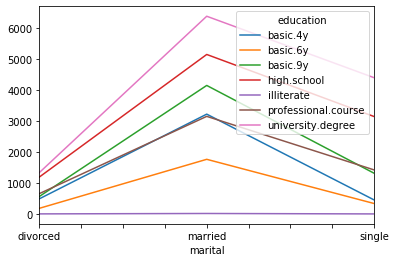

In [66]:
table.plot();

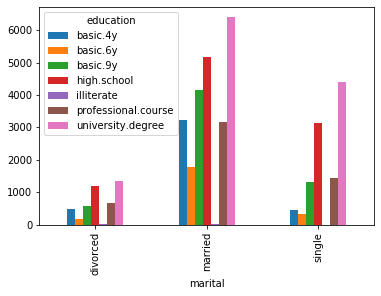

In [67]:
# probably the best visualization of the 3 I created.

table.plot(kind='bar');

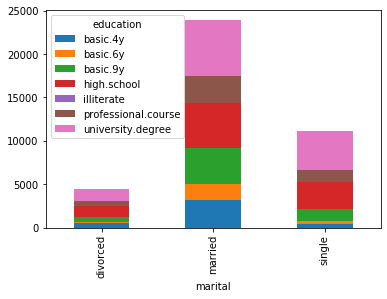

In [68]:
table.plot(kind='bar', stacked=True)

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

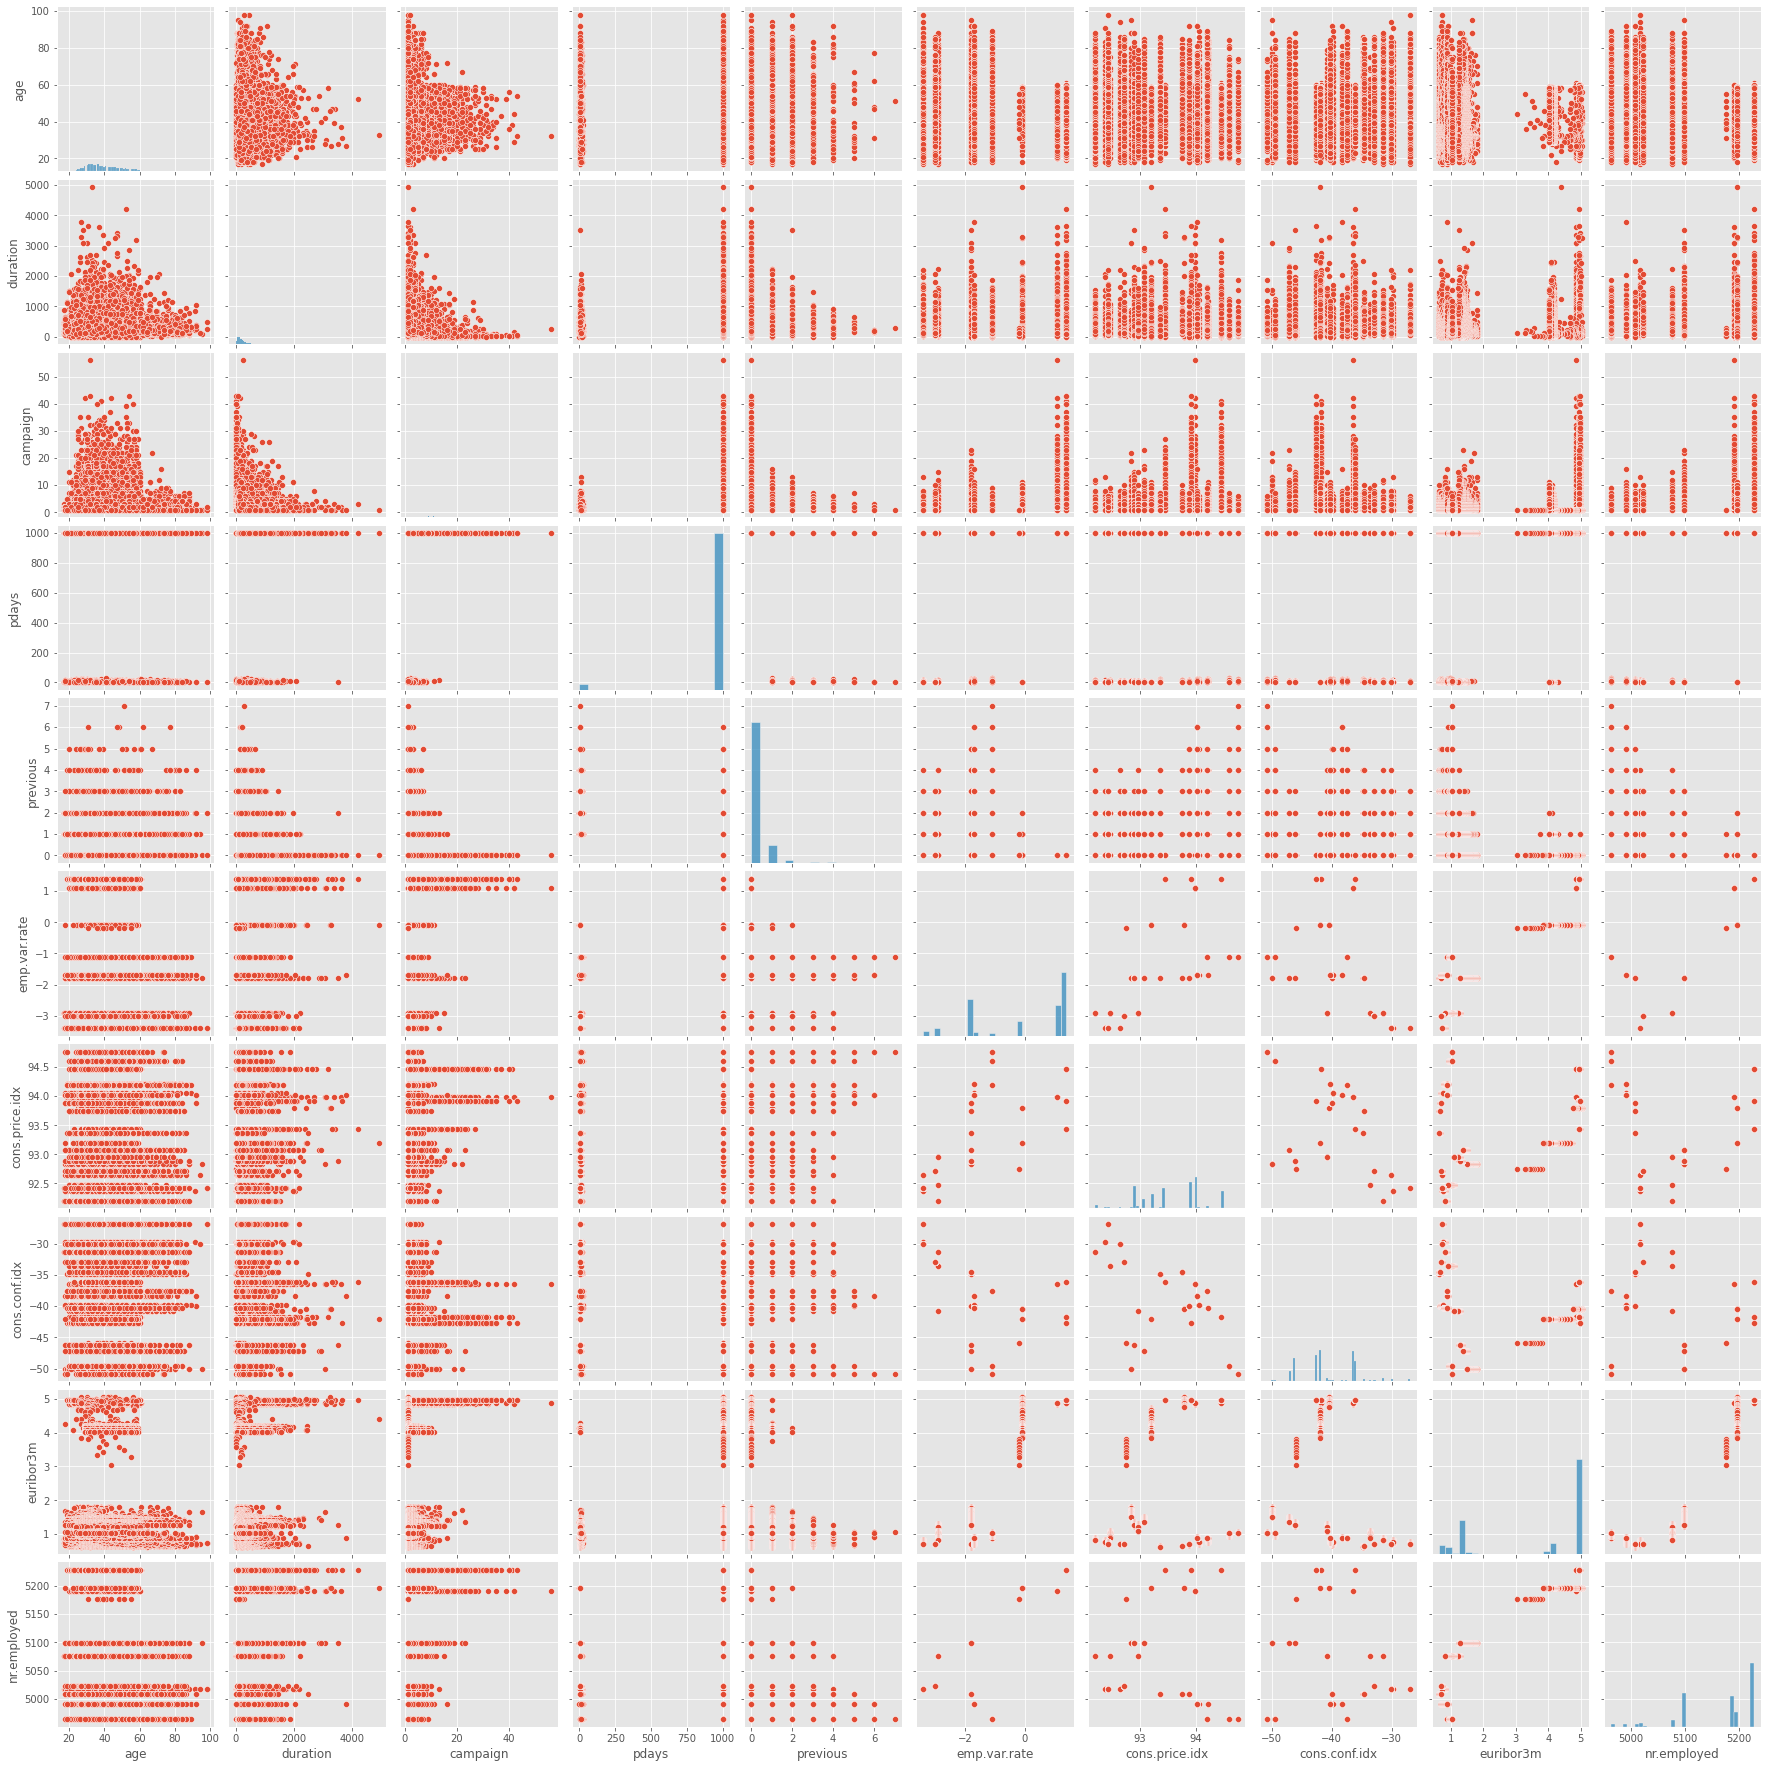

In [55]:
import seaborn as sns
from matplotlib import style
style.use('ggplot')
sns.pairplot(df1)

In [57]:
# Here's all the color styles.
# I picked one that would render the axes readable in dark mode.
print(style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [82]:
# pd.cut()  # cut into equidistant bins
# pd.qcut() # cut into quantiles

lst = list(df1.describe(include='number').columns)
print(lst)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_cut
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37.25, 57.5]"
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37.25, 57.5]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(16.919, 37.25]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37.25, 57.5]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37.25, 57.5]"


In [130]:
table = pd.crosstab(pd.cut(df1['age'], 10), df1['job'])
print(table)

job             admin.  blue-collar  entrepreneur  housemaid  management  \
age                                                                        
(16.919, 25.1]     315          327            20         11          38   
(25.1, 33.2]      3581         2309           275        135         548   
(33.2, 41.3]      3184         2966           472        282         867   
(41.3, 49.4]      1911         2193           353        242         710   
(49.4, 57.5]      1152         1280           280        264         609   
(57.5, 65.6]       265          174            52         94         143   
(65.6, 73.7]        14            4             4         14           4   
(73.7, 81.8]         0            1             0          8           5   
(81.8, 89.9]         0            0             0         10           0   
(89.9, 98.0]         0            0             0          0           0   

job             retired  self-employed  services  student  technician  \
age           

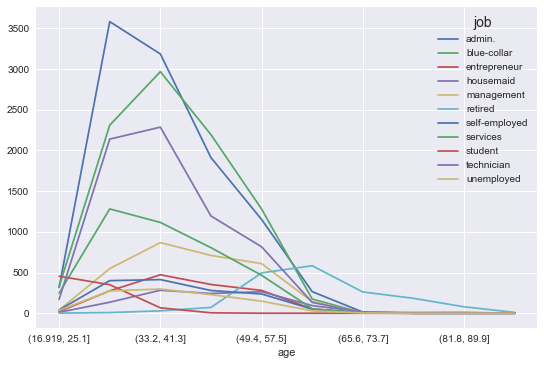

In [132]:
style.use('seaborn')
table.plot();
#table.plot.bar();
#table.plot(kind='bar', stacked='true');
# pd.crosstab(df['education'], df['sex']).plot(kind='bar', stacked='true');